<a href="https://colab.research.google.com/github/itspopoy57/Machinelearning/blob/main/04_Transfer_Learning_P2_finetune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FineTuning



In [1]:
###FineTuning

"""
in previous notebooks weve created a bunch of helper functions, now we can rewrite them
or we can use this

i have a file on github named helper_func.py there
all the function that ill need to use on here

"""

!wget https://raw.githubusercontent.com/itspopoy57/Machinelearning/main/extras/helper_func.py

--2023-11-01 02:45:11--  https://raw.githubusercontent.com/itspopoy57/Machinelearning/main/extras/helper_func.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_func.py’

helper_func.py      100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-11-01 02:45:11 (113 MB/s) - ‘helper_func.py’ saved [10246/10246]



In [2]:
from helper_func import *

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-11-01 02:45:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.6.207, 172.217.214.207, 172.253.114.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.6.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   180MB/s    in 0.9s    

2023-11-01 02:45:16 (180 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [3]:
unzip_data("/content/10_food_classes_10_percent.zip")
### btw this one is because of the helper_func.py

##Lets get some data

we are getting some pretrained models at
tf.keras.applications


In [4]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent

###before we are using from tensorflow.keras.preprocessing.image import ImageDataGenerator


now we are using tf.data.Dataset
which is faster but like imagedatagenerator is still the original and this is just new and improve version


In [5]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"


In [6]:
import tensorflow as tf
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMAGE_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=32)
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size=IMAGE_SIZE,
                                                                           batch_size=32,
                                                                           label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [7]:
train_data_10_percent

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

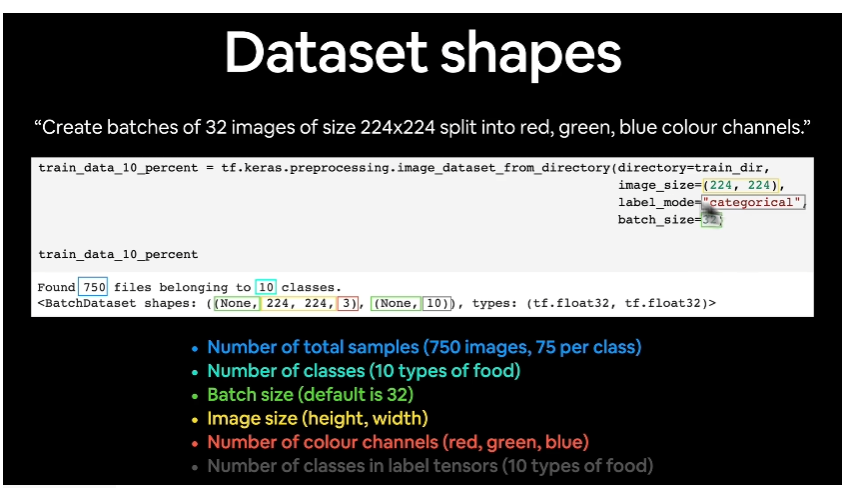

In [8]:
##  that is just a guide so that you know what are those

In [9]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [10]:
#see an example of a batch of data
#for images, labels in train_data_10_percent.take(1):
#  print(images, labels)

##FUNCTIONAL API VS SEQUENTIAL API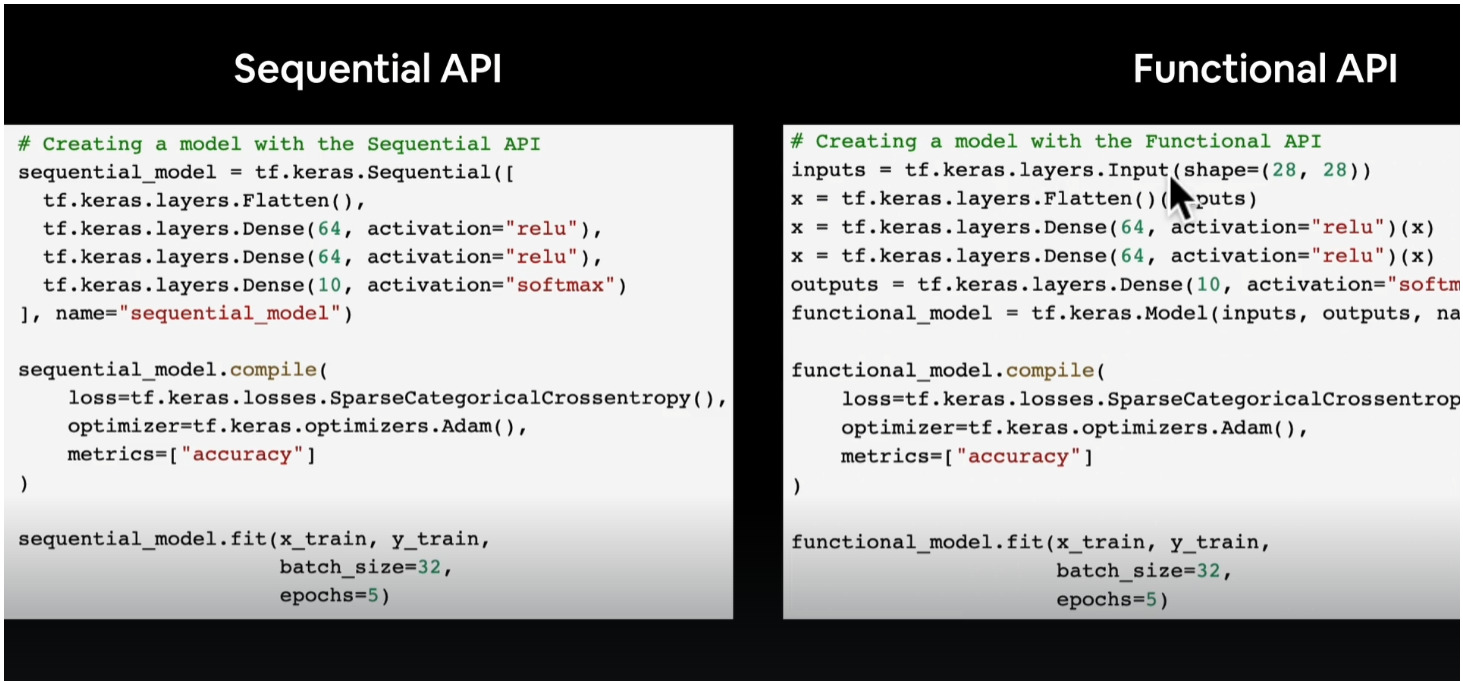

In [11]:
##########
######## new ; base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
#########

###old : base_model = tf.keras.applications.EfficientNetB0(include_top=False)

## this is the model youll follow now

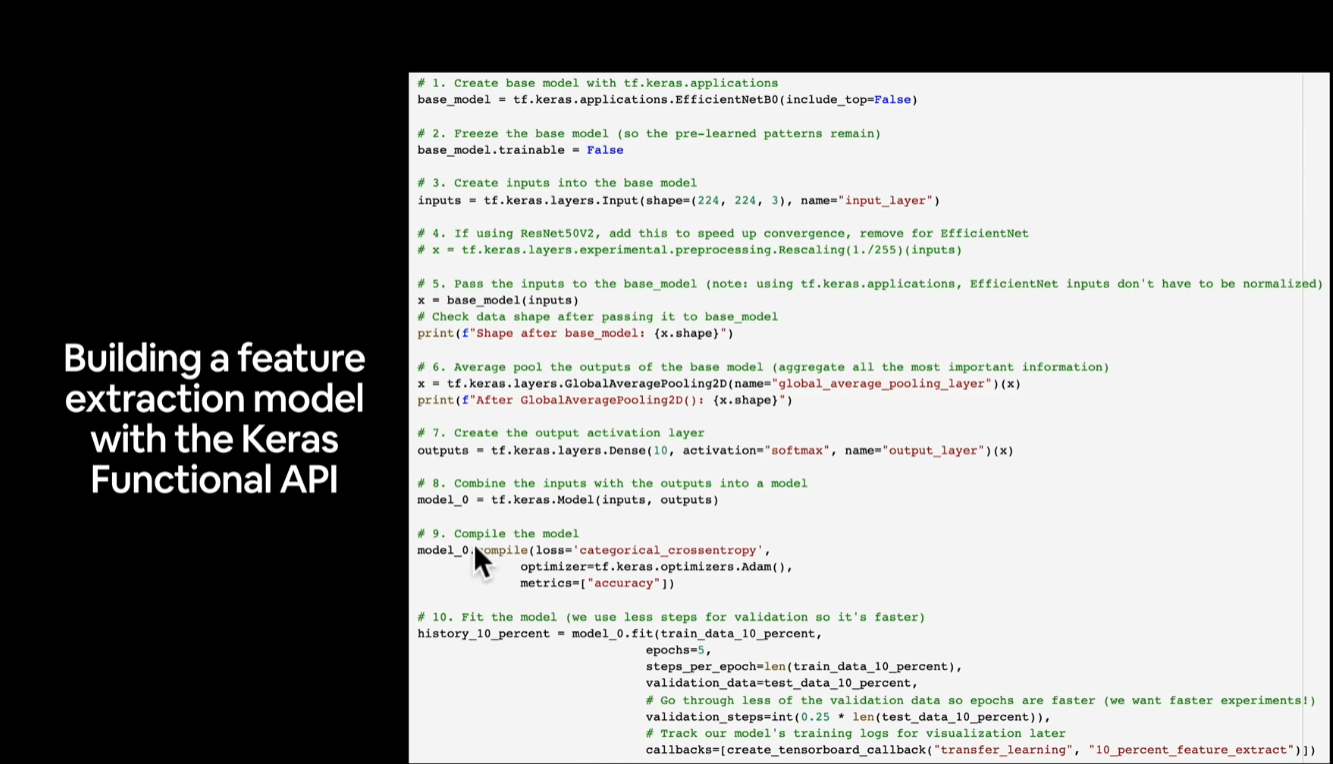

#Model 0

In [14]:
#model 0 : building a transfer learning model using keras functional api

# 1. create a base model
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

#this is transfer learning we have 10 output neuros and this v2b0 pretrained by imagenet has 1000 neuros
# 2. Freeze the base model (so the underlying pre trained patterns arent updatd during trainings)
base_model.trainable = False

# 3. create inputs into our model // its just a name you can change that lol
inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")

# 4. this is optional but If youre using ResNet50V2 you will need to normalize inputs
    #note if its not learning check the model that youre training on if theyre the same input
    #you dont need this for efficientnet because it already has built in unlike the RESNET50V2
#x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)


# 5. Pass the inputs to the base_model
x = base_model(inputs)
print(f"Shape after passing the inputs through base model: {x.shape}")

# 6. average pool the outputs of the base model (aggregate all the most important information, reduce number of computation)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after global average pooling 2d.: {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# 8. combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile for the model
model_0.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


# 10. fit the model
history_10_percent = model_0.fit(train_data_10_percent, epochs=5,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data=test_data_10_percent,
                                  validation_steps=len(test_data_10_percent),
                                 callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                        experiment_name="10_percent_feature_extraction")])




Shape after passing the inputs through base model: (None, 7, 7, 1280)
Shape after global average pooling 2d.: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20231101-031132
Epoch 1/5
24/24 [==============================] - 17s 383ms/step - loss: 1.8994 - accuracy: 0.4027 - val_loss: 1.3455 - val_accuracy: 0.7060
Epoch 2/5
24/24 [==============================] - 7s 278ms/step - loss: 1.1571 - accuracy: 0.7413 - val_loss: 0.9114 - val_accuracy: 0.7992
Epoch 3/5
24/24 [==============================] - 8s 321ms/step - loss: 0.8459 - accuracy: 0.8253 - val_loss: 0.7266 - val_accuracy: 0.8392
Epoch 4/5
24/24 [==============================] - 8s 319ms/step - loss: 0.6895 - accuracy: 0.8373 - val_loss: 0.6339 - val_accuracy: 0.8524
Epoch 5/5
24/24 [==============================] - 7s 270ms/step - loss: 0.6016 - accuracy: 0.8653 - val_loss: 0.5781 - val_accuracy: 0.8520


In [16]:
# evaluate the full test dataset
model_0.evaluate(test_data_10_percent)

79/79 [==============================] - 5s 63ms/step - loss: 0.5781 - accuracy: 0.8520


[0.5781034827232361, 0.8519999980926514]

In [1]:
#check the layers in our base model
"""
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

  """

'\nfor layer_number, layer in enumerate(base_model.layers):\n  print(layer_number, layer.name)'

In [2]:
#how about the summary of the base model
#base_model.summary()

In [20]:
#summary of the entire model
model_0.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 5919312 (22.58 MB)
________________

##getting a feature vector from a trained model

lets demonstrate the global average pooling 2d layer
we have a tensor after our model goes through
base model of the shape of (none,7,7, 1280)

what globalaveragepooling2d does is converting this 4d to 2d

lets use a similar shaped tensor (1,4,4,3) then pass this to globalaveragePOoling2d

In [ ]:
#define the input shape
input_shape = (1,4,4,3)


#Pre Model 1

###RUnning other model same problem lol



model 1 is data augmentation we need to augment the data that we are using so that it could be identify easier

In [1]:
## pre processed from food 101 1% data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2023-11-02 15:31:29--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.182.207, 64.233.183.207, 173.194.193.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.182.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   115MB/s    in 1.1s    

2023-11-02 15:31:30 (115 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [2]:
###FineTuning

"""
in previous notebooks weve created a bunch of helper functions, now we can rewrite them
or we can use this

i have a file on github named helper_func.py there
all the function that ill need to use on here

"""

!wget https://raw.githubusercontent.com/itspopoy57/Machinelearning/main/extras/helper_func.py

--2023-11-02 15:31:30--  https://raw.githubusercontent.com/itspopoy57/Machinelearning/main/extras/helper_func.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_func.py’

helper_func.py      100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-11-02 15:31:30 (108 MB/s) - ‘helper_func.py’ saved [10246/10246]



In [3]:
from helper_func import *


In [4]:
unzip_data("10_food_classes_1_percent.zip")

In [5]:
train_dir_m1 = "/content/10_food_classes_1_percent/train"
test_dir_m1 = "/content/10_food_classes_1_percent/test"

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import Rescaling


IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32


#augment here?
#no we are writing the data augmentation right in to the model unlike the other model
#reference 03 Convo2

## to add augmented data inside the model itself you can use
#tf.keras.layers.experimental.preprocessing()

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_m1,
                                                                            image_size=IMAGE_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=32)
test_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir_m1,
                                                                           image_size=IMAGE_SIZE,
                                                                           batch_size=32,
                                                                           label_mode="categorical")

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [7]:
##########
#creating the data augmentation here
###########

### rescale is also here
## just in case there is resnet50v2 model coz they dont have the rescale built in

data_augmentation = tf.keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.Rescaling(1./255)
], name="data_augmentation")

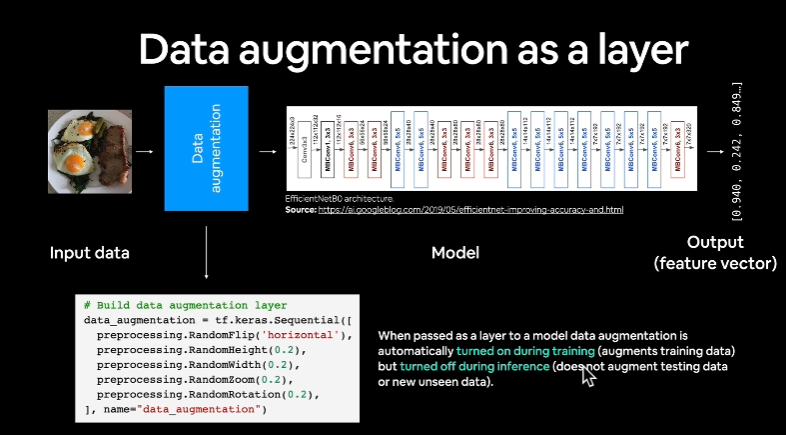

##Visualize the data_augmented

10_food_classes_1_percent/train/ramen/196184.jpg


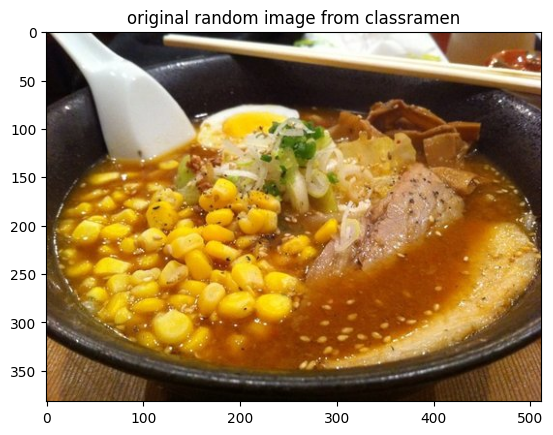

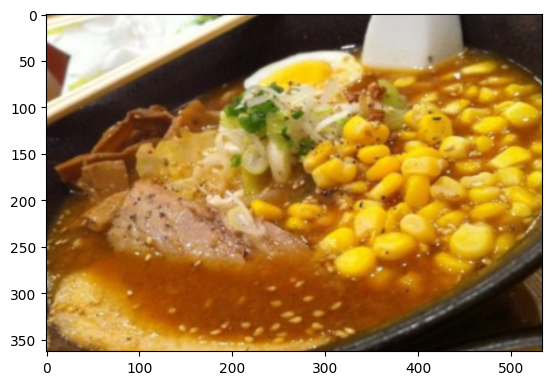

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/"+target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir+"/"+random_image

#Read in the random Image

img = mpimg.imread(random_image_path)
plt.title(f"original random image from class{target_class}")
plt.imshow(img)
print(random_image_path)


## plot the augmented random image
augmented_img = data_augmentation(img)

#if your data is expecting 4 dims and you have 3dims this is what you do
#augmented_img = data_augmentation(tf.expand_dims(img, axis=0))
#and normalize them
#plt.imshow(tf.squeeze(augmented_img)/255.)

plt.figure()
plt.imshow(augmented_img)

##Model 1

In [22]:
### model1
##setup the inputshape and basemodel
#or use IMg_size +(3,)
#IF YOU define the img_size as (224,224) already


input_shape_m1 = (224,224,3)
basemodel1 = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
basemodel1.trainable = False

## creating the inputlayer
inputs_m1 = tf.keras.layers.Input(shape=input_shape_m1, name = "input_layer_1")

#add in data augmentation sequential model as a layer
x = data_augmentation(inputs_m1)

#give basemodel the inputs after they have been augmented and dont train it
x = basemodel1(x, training=False)

#pool output features of the base model
x = layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)

##put your dense layer as output
#x = layers.Dense(100, activation="relu")(x)
outputs_m1 = layers.Dense(10, activation="softmax", name="output_layer")(x)

#make the model using the inputs and outputs
model_1 = keras.Model(inputs_m1, outputs_m1)

#compile
model_1.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit
history_m1 = model_1.fit(train_data_1_percent, epochs=10,
                         steps_per_epoch=len(train_data_1_percent),
                        validation_data=test_data_1_percent,
                          validation_steps=len(test_data_1_percent),
                          callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                experiment_name="1_percent_feature_extraction")])





Saving TensorBoard log files to: transfer_learning/1_percent_feature_extraction/20231102-160921
Epoch 1/10
3/3 [==============================] - 17s 4s/step - loss: 2.4059 - accuracy: 0.1000 - val_loss: 2.3421 - val_accuracy: 0.1000
Epoch 2/10
3/3 [==============================] - 6s 3s/step - loss: 2.3617 - accuracy: 0.1000 - val_loss: 2.3360 - val_accuracy: 0.1000
Epoch 3/10
3/3 [==============================] - 6s 3s/step - loss: 2.3509 - accuracy: 0.1143 - val_loss: 2.3300 - val_accuracy: 0.1000
Epoch 4/10
3/3 [==============================] - 7s 3s/step - loss: 2.3489 - accuracy: 0.0571 - val_loss: 2.3254 - val_accuracy: 0.1000
Epoch 5/10
3/3 [==============================] - 7s 3s/step - loss: 2.3501 - accuracy: 0.1286 - val_loss: 2.3264 - val_accuracy: 0.1000
Epoch 6/10
3/3 [==============================] - 7s 3s/step - loss: 2.3404 - accuracy: 0.1000 - val_loss: 2.3326 - val_accuracy: 0.1000
Epoch 7/10
3/3 [==============================] - 6s 3s/step - loss: 2.3432 - acc

#pre Model 2
same as model 0 but augmented
so its 10 percent


## getting the data and the helper_func.py

In [1]:
# this is the helper func on my github
!wget https://raw.githubusercontent.com/itspopoy57/Machinelearning/main/extras/helper_func.py


--2023-11-02 18:13:14--  https://raw.githubusercontent.com/itspopoy57/Machinelearning/main/extras/helper_func.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_func.py’

helper_func.py      100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2023-11-02 18:13:14 (18.8 MB/s) - ‘helper_func.py’ saved [10246/10246]



In [2]:
from helper_func import *

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-11-02 18:13:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.251.2.207, 2607:f8b0:4023:c03::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   101MB/s    in 1.6s    

2023-11-02 18:13:20 (101 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [3]:
unzip_data("/content/10_food_classes_10_percent.zip")
### btw this one is because of the helper_func.py

In [4]:
train_dir_m2 = "10_food_classes_10_percent/train"
test_dir_m2 = "10_food_classes_10_percent/test"


In [7]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

import random

IMG_SIZE=(224,224)
BATCH_SIZE = 32

# preprocessing
train_data_10_percent_m2 = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_m2,
                                                                               label_mode="categorical",
                                                                               batch_size=BATCH_SIZE,
                                                                               image_size=IMG_SIZE)

test_data_10_percent_m2 = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir_m2,
                                                                              label_mode="categorical",
                                                                              image_size=IMG_SIZE,
                                                                              batch_size=BATCH_SIZE)






Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [8]:
augmented_img_m2 = tf.keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomRotation(0.3),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.Rescaling(1./255)
], name="data_augmentation_m2")

10_food_classes_10_percent/train/ice_cream/2165749.jpg


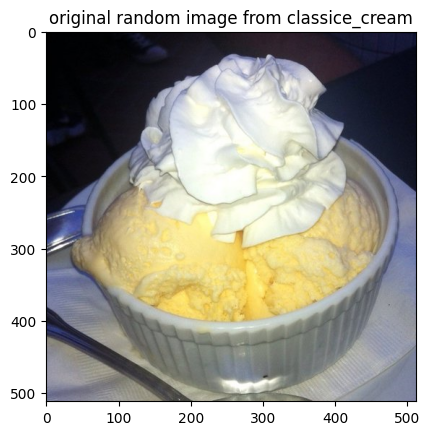

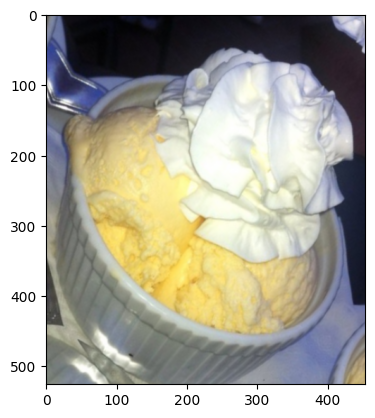

In [14]:
########visualize

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_10_percent_m2.class_names)
target_dir = "10_food_classes_10_percent/train/"+target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir+"/"+random_image

#Read in the random Image

img = mpimg.imread(random_image_path)
plt.title(f"original random image from class{target_class}")
plt.imshow(img)
print(random_image_path)


## plot the augmented random image
augmented_img = augmented_img_m2(img)

#if your data is expecting 4 dims and you have 3dims this is what you do
#augmented_img = data_augmentation(tf.expand_dims(img, axis=0))
#and normalize them
#plt.imshow(tf.squeeze(augmented_img)/255.)

plt.figure()
plt.imshow(augmented_img)

##Model 2

In [17]:
from keras.src.layers.attention.multi_head_attention import activation
##model 2

input_shape_m2 = (224,244,3)
basemodel2 = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
basemodel2.tranable = False

inputs_m2 = tf.keras.layers.Input(shape=(224,224,3), name="input_layer_2")

#augmented first
x = augmented_img_m2(inputs_m2)
x = basemodel2(x, training = False)
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer_2")(x)

outputs_m2 = layers.Dense(10, activation="softmax", name="output_layer_m2")(x)

model_2 = tf.keras.Model(inputs_m2, outputs_m2)
model_2.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_m2 = model_2.fit(train_data_10_percent_m2, epochs=5,
              steps_per_epoch=len(train_data_10_percent_m2),
              validation_data = test_data_10_percent_m2,
              validation_steps=len(test_data_10_percent_m2),
              callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                  experiment_name="10_percent_feature_extraction_m2")])



Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction_m2/20231102-191814
Epoch 1/5
24/24 [==============================] - 121s 3s/step - loss: 2.4376 - accuracy: 0.1013 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 2/5
24/24 [==============================] - 47s 2s/step - loss: 2.3248 - accuracy: 0.0907 - val_loss: 2.3026 - val_accuracy: 0.1000


KeyboardInterrupt: ignored